In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data analysis

In [3]:
data = pd.read_csv("student\student-mat.csv", sep = ';')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

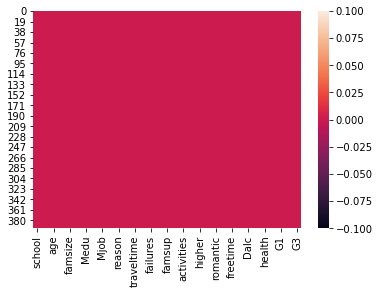

In [18]:
sns.heatmap(data.isnull())

We can see that we have every entry in the data set.

In [22]:
data.describe(include = 'O')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Pre-proc

In [5]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:

# Make copy to avoid changing original data 
data_prec = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    data_prec[col] = label_encoder.fit_transform(data[col])
    data_prec[col] = label_encoder.transform(data[col])

O objetivo é prever G3 dados G2 e G1, e Prever G3 sem G2 e G1.

In [57]:
data_prec.dtypes == 'object'


school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [39]:
data_prec.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [103]:
X = data_prec.drop('G3', axis = 1)
y = data_prec['G3']

In [8]:
from sklearn.model_selection import train_test_split


In [104]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
model = linear_model.LinearRegression()

In [106]:
model.fit(train_X,train_y)
pred = model.predict(val_X)
mean_absolute_error(val_y,pred), model.score(val_X,val_y)


(1.2091033628445396, 0.8170500422786674)

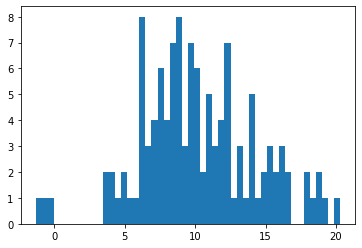

In [80]:
plt.hist(pred,bins = 50)
plt.show()

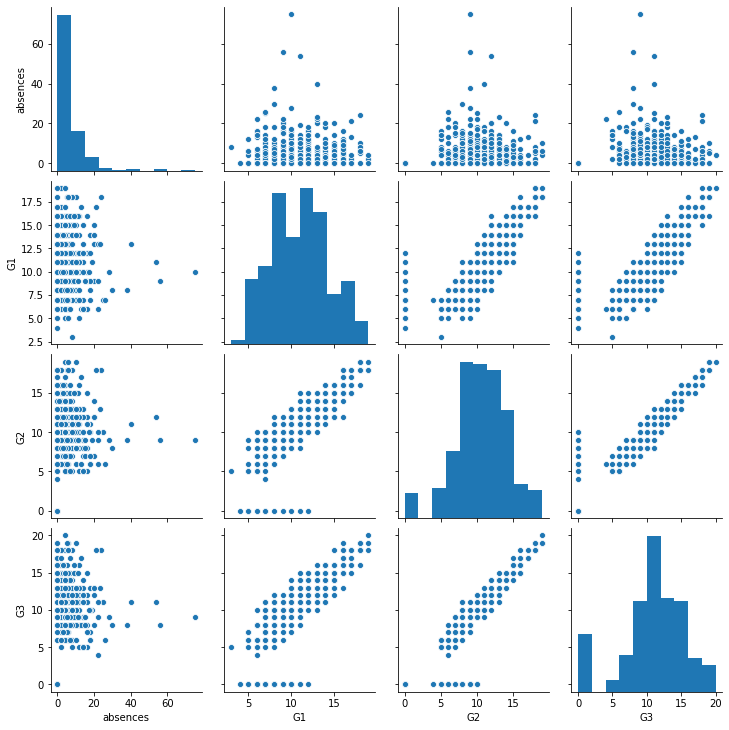

In [78]:
sns.pairplot(data_prec[data_prec.columns[-4:]])

In [107]:
X = data_prec.drop(['G3','G2','G1'], axis = 1)
y = data_prec['G3']

In [108]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)
model2 = linear_model.LinearRegression()
model2.fit(train_X,train_y)
pred2 = model2.predict(val_X)
mean_absolute_error(val_y,pred)

4.57881529991176

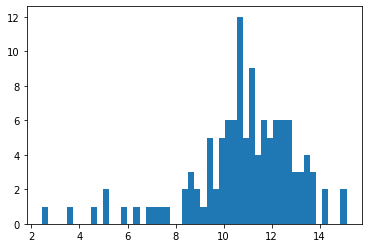

In [95]:
plt.hist(pred,bins = 50)
plt.show()

In [109]:
model2.score(val_X,val_y)

0.2079748136806867

Agora que aplicamos regressão linear para todas as entradas, vamos tentar selecionar as mais importantes
a ideia é verificar se alguma coluna está adicionando ruído ao modelo.

In [114]:
mae = []
score = []
for i in data_prec.columns[:-1:]:
    X = data_prec.drop([i,'G3'], axis = 1)
    y = data_prec['G3']
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)
    model2 = linear_model.LinearRegression()
    model2.fit(train_X,train_y)
    pred2 = model2.predict(val_X)
    mae.append(mean_absolute_error(val_y,pred))
    score.append(model2.score(val_X,val_y))

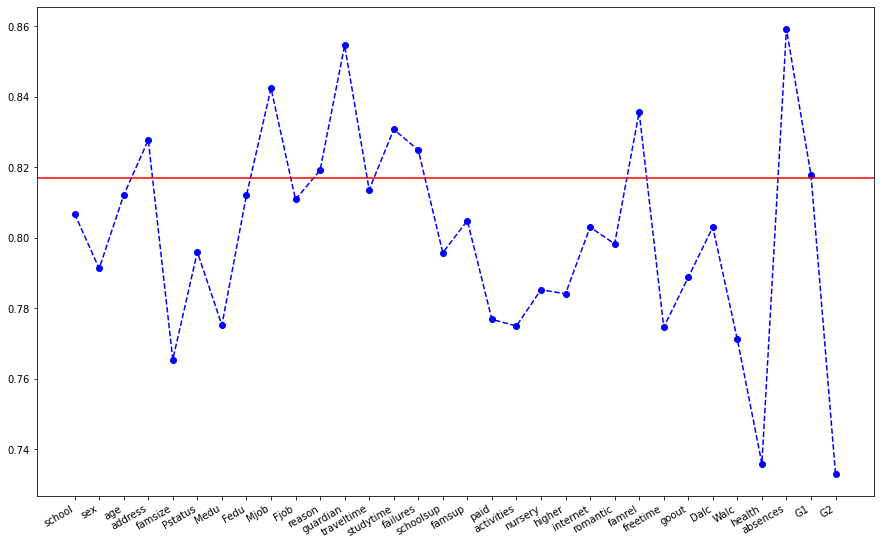

In [132]:
f, ax = plt.subplots(figsize = (15,10))
ax.plot(data_prec.columns[:-1],score,'bo--')
plt.axhline(0.8170500422786674,color = 'r')
f.autofmt_xdate()
plt.show()

In [133]:
mae = []
score = []
for i in data_prec.columns[:-3:]:
    X = data_prec.drop([i,'G3','G2','G1'], axis = 1)
    y = data_prec['G3']
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)
    model2 = linear_model.LinearRegression()
    model2.fit(train_X,train_y)
    pred2 = model2.predict(val_X)
    mae.append(mean_absolute_error(val_y,pred))
    score.append(model2.score(val_X,val_y))

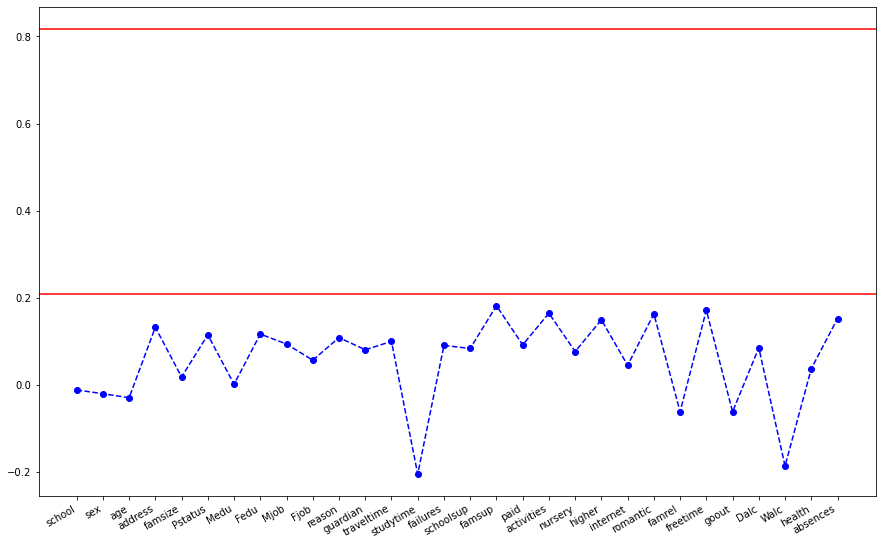

In [135]:
f, ax = plt.subplots(figsize = (15,10))
ax.plot(data_prec.columns[:-3],score,'bo--')
plt.axhline(0.8170500422786674,color = 'r')
plt.axhline(0.2079748136806867,color = 'r')

f.autofmt_xdate()
plt.show()

Podemos ver que tempo de estudo é um dado muito relevante na hora da predição do modelo. Vamos aumentar o peso desses dados no nosso modelo.

In [107]:
X = data_prec.drop(['G3','G2','G1'], axis = 1)
y = data_prec['G3']
X['studytime'] = X['studytime'].apply(lambda x: x**4)

In [108]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)
model2 = linear_model.LinearRegression()
model2.fit(train_X,train_y)
pred2 = model2.predict(val_X)
mean_absolute_error(val_y,pred2)

1.966534963488393

In [109]:
model2.score(val_X,val_y)

0.6745094711345716

In [34]:
X = data_prec.drop(['G3','G2','G1'], axis = 1)
y = data_prec['G3']
X['studytime'] = X['studytime'].apply(lambda x: x)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)
model2 = linear_model.LinearRegression()
model2.fit(train_X,train_y)
pred2 = model2.predict(val_X)
mean_absolute_error(val_y,pred2)

model2.score(val_X,val_y),mean_absolute_error(val_y,pred2)

(0.13081806902199533, 3.337686472726904)

In [35]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()


In [36]:
clf.fit(train_X,train_y)
clf.score(val_X,val_y)

-0.35240703168229737

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .3)


In [38]:
model2.fit(train_X,train_y)
pred2 = model2.predict(val_X)
mean_absolute_error(val_y,pred2)

model2.score(val_X,val_y),mean_absolute_error(val_y,pred2)

(0.0924212408745797, 3.6624689013385563)